### Assignment

Please review the dataset and start outlining the way you would go about the model-building process with the eventual goal of predicting the probability of pitch type X in a real-time environment.

I understand actually delivering a model/predictions with any degree of accuracy is unlikely in this short time span, so please focus on providing any associated data analysis (plots, graphs etc..), feature engineering and code assembled during the 3-5 hours.

Lastly, please provide the future steps you would take from a data/technology perspective to finalize this project and the ways you would measure success.

This is meant to be open-ended/creative project, so focus your time where you see best fit. Please don’t hesitate to reach out with any questions and look forward to the follow-up.

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Get access to the data and inspect it

In [2]:
data = pd.read_csv('pitches', parse_dates=['date'])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [4]:
data.tail()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
718956,19838192,317073,2011,2011-10-28,140,138,9,1,72,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718957,19838193,317073,2011,2011-10-28,140,138,9,1,72,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718958,19838194,317073,2011,2011-10-28,140,138,9,1,72,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718959,19838195,317073,2011,2011-10-28,140,138,9,1,73,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718960,19838196,317073,2011,2011-10-28,140,138,9,1,73,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Columns: 125 entries, uid to modified_by
dtypes: datetime64[ns](1), float64(80), int64(25), object(19)
memory usage: 685.7+ MB


In [6]:
data.describe()

,uid,game_pk,year,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,...,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,modified_by
count,7.189610e+05,718961.000000,718961.0,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,718961.0
mean,1.701980e+07,288557.611823,2011.0,128.787182,128.757296,5.033796,0.508900,39.301513,2.865276,37.357196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,1.665143e+06,3642.210956,0.0,14.281039,14.306711,2.692326,0.499921,23.320725,1.715068,30.690569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.414323e+07,286874.000000,2011.0,108.000000,108.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,1.557356e+07,287507.000000,2011.0,115.000000,115.000000,3.000000,0.000000,19.000000,1.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,1.703106e+07,288129.000000,2011.0,134.000000,134.000000,5.000000,1.000000,39.000000,3.000000,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,1.845894e+07,288749.000000,2011.0,141.000000,141.000000,7.000000,1.000000,58.000000,4.000000,61.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,1.983820e+07,317073.000000,2011.0,158.000000,158.000000,19.000000,1.000000,158.000000,16.000000,133.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Data Wrangling

###### Check for missing values

In [7]:
np.sum(pd.notnull(data))

uid               718961
game_pk           718961
year              718961
date              718961
team_id_b         718961
team_id_p         718961
inning            718961
top               718961
at_bat_num        718961
pcount_at_bat     718961
pcount_pitcher    718961
balls             718961
strikes           718961
fouls             718961
outs              718961
is_final_pitch    718961
final_balls       718961
final_strikes     718961
final_outs        718961
start_tfs         718961
start_tfs_zulu    718961
batter_id         718961
stand             718961
b_height          718961
pitcher_id        718961
p_throws          718961
at_bat_des        718961
event             718961
event2              8299
event3               334
                   ...  
runner4_end            0
runner4_event          0
runner4_score          0
runner4_rbi            0
runner4_earned         0
runner5_id             0
runner5_start          0
runner5_end            0
runner5_event          0


###### Remove uncessary and empty columns

In [8]:
columns_to_drop = data.loc[:, 'runner1_id':]
data_1 = data.drop(columns_to_drop, axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 72 columns):
uid                718961 non-null int64
game_pk            718961 non-null int64
year               718961 non-null int64
date               718961 non-null datetime64[ns]
team_id_b          718961 non-null int64
team_id_p          718961 non-null int64
inning             718961 non-null int64
top                718961 non-null int64
at_bat_num         718961 non-null int64
pcount_at_bat      718961 non-null int64
pcount_pitcher     718961 non-null int64
balls              718961 non-null int64
strikes            718961 non-null int64
fouls              718961 non-null int64
outs               718961 non-null int64
is_final_pitch     718961 non-null int64
final_balls        718961 non-null int64
final_strikes      718961 non-null int64
final_outs         718961 non-null int64
start_tfs          718961 non-null int64
start_tfs_zulu     718961 non-null object
batter_id         

---
The Pitch type column indicates which pitch was thrown. Given that'll become our label for this problem set, I'm going to remove missing the missing values from the pitch_type column.

---

In [9]:
df = data_1[pd.notnull(data_1['pitch_type'])]
df = df.reset_index(drop=True)
df.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,cc,on_1b,on_2b,on_3b
0,14143252,286874,2011,2011-03-31,118,108,1,0,7,1,...,FF,2.0,8.0,47.0,183.148,2519.455,NaN,NaN,NaN,NaN
1,14143253,286874,2011,2011-03-31,118,108,1,0,7,2,...,FF,2.0,12.0,25.0,187.663,2838.803,NaN,NaN,NaN,NaN
2,14143254,286874,2011,2011-03-31,118,108,1,0,7,3,...,FF,2.0,14.0,64.0,179.643,2701.919,NaN,NaN,NaN,NaN
3,14143255,286874,2011,2011-03-31,118,108,1,0,7,4,...,FF,2.0,3.0,49.0,184.623,2683.280,NaN,NaN,NaN,NaN
4,14143256,286874,2011,2011-03-31,118,108,1,0,7,5,...,FF,2.0,6.0,32.0,182.338,3352.205,NaN,NaN,NaN,NaN


### Exploratory Analysis

###### How many different pitch types are in the dataset? How often was each one thrown during the season?

In [10]:
def get_percentage(data, column):
    """Add the percentage from count to a dataframe."""
    total = np.count_nonzero(data[column])
    p = data[column].value_counts().reset_index().rename(columns={'index':'pitch_type', 'pitch_type':'count'})
    p['percentage'] = (p['count'] / total) * 100
    return p

p = get_percentage(df, 'pitch_type')
p

,pitch_type,count,percentage
0,FF,238541,33.284125
1,SL,109756,15.314484
2,SI,87740,12.242546
3,FT,81056,11.309913
4,CH,72641,10.135751
5,CU,56379,7.866680
6,FC,41702,5.818767
7,FS,10503,1.465506
8,KC,8490,1.184627
9,KN,4450,0.620918


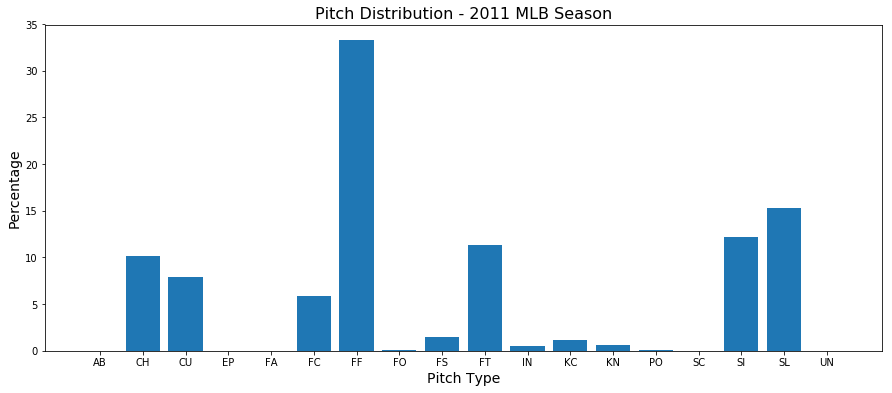

In [11]:
# Adjust plot size
plt.figure(figsize=(15, 6))

# Plot
plt.bar(p['pitch_type'], p['percentage'])

# Labels
plt.xlabel('Pitch Type', size=14)
plt.ylabel('Percentage', size=14)
plt.title('Pitch Distribution - 2011 MLB Season', size=16)

# Display plot
plt.show()

In [12]:
# Filter data to include top 6 occuring pitches
top_6 = p['pitch_type'][:6]
df = df[df['pitch_type'].isin(top_6)]
df.shape

(646113, 72)

###### Does the number of outs have an impact on pitch selection?

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


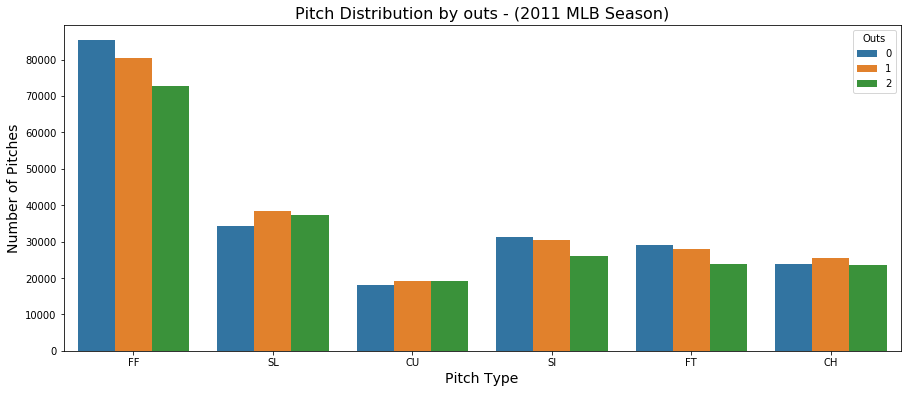

In [13]:
plt.figure(figsize=(15, 6))

sns.countplot(x = 'pitch_type', hue = 'outs', data = df)

plt.xlabel('Pitch Type', size=14)
plt.ylabel('Number of Pitches', size=14)
plt.title('Pitch Distribution by outs - (2011 MLB Season)', size=16)
plt.legend(loc='upper right', title='Outs')
plt.show()

---
Speaking broadly, it appears the higher the count, the less fastballs are thrown. Those pitches get distributed into different buckets, with a higher rate for Sliders, cutters, and "IN".

---

###### How does pitch selection change with the balls-strike count?

In [14]:
the_count = list(zip(df['balls'], df['strikes']))
df['count'] = the_count
agg_1 = df[['pitch_type', 'count']]

count = pd.pivot_table(agg_1, index='pitch_type', columns='count', aggfunc=np.count_nonzero)\
        .unstack().reset_index().rename(columns={0:'qty'})

count_dict = dict(count.groupby('count')['qty'].sum())

count['total_pitches'] = count['count'].apply(lambda x: count_dict[x])
count['percentage'] = count['qty']/count['total_pitches']*100

for pitch in count['pitch_type'].unique():
    print(count[count['pitch_type'] == pitch])

     count pitch_type      qty  total_pitches  percentage
0   (0, 0)         CH  28858.0       342058.0    8.436581
6   (0, 1)         CH  20944.0       162080.0   12.922014
12  (0, 2)         CH   6998.0        78560.0    8.907841
18  (1, 0)         CH  18760.0       137662.0   13.627581
24  (1, 1)         CH  20498.0       131332.0   15.607773
30  (1, 2)         CH  13484.0       116816.0   11.542939
36  (2, 0)         CH   4362.0        47758.0    9.133548
42  (2, 1)         CH   9378.0        70014.0   13.394464
48  (2, 2)         CH  13198.0        99944.0   13.205395
54  (3, 0)         CH    378.0        15406.0    2.453590
60  (3, 1)         CH   2038.0        29926.0    6.810132
66  (3, 2)         CH   6386.0        60666.0   10.526489
72  (4, 2)         CH      NaN            4.0         NaN
     count pitch_type      qty  total_pitches  percentage
1   (0, 0)         CU  29116.0       342058.0    8.512007
7   (0, 1)         CU  19228.0       162080.0   11.863277
13  (0, 2)    

Some interesting insights from the tables above:
* When the pitcher already has 2 strikes, as a whole, they more likely to thrown a slider when compared to other combinations in the count.
* The sinker works the opposite as the slider, with the likelyhood of it being thrown going down the more strikes are on the count.
* When the pitcher is behind on the count at 3 balls - 0 strikes, the likelihood of throwing at fastball almost doubles to 60%.

###### Does pitch selection change with runners on base vs. no runners on base?

In [15]:
any_base = df['on_1b'] + df['on_2b'] + df['on_3b']

on_base = []
for i in any_base:
    if i > 0:
        on_base.append('on_base')
    else: on_base.append('empty_bases')
df['on_base'] = on_base

In [16]:
agg_2 = df[['pitch_type', 'on_base']]

def filter_data(data, column, keyword):
    """Filter dataframe. Input columna and keyword as text."""
    new_data = data[data[column] == keyword]
    return new_data

empty_bases = filter_data(agg_2, 'on_base', 'empty_bases')
on_base = filter_data(agg_2, 'on_base', 'on_base')

p_empty_bases = get_percentage(empty_bases, 'pitch_type')
p_on_base = get_percentage(on_base, 'pitch_type')

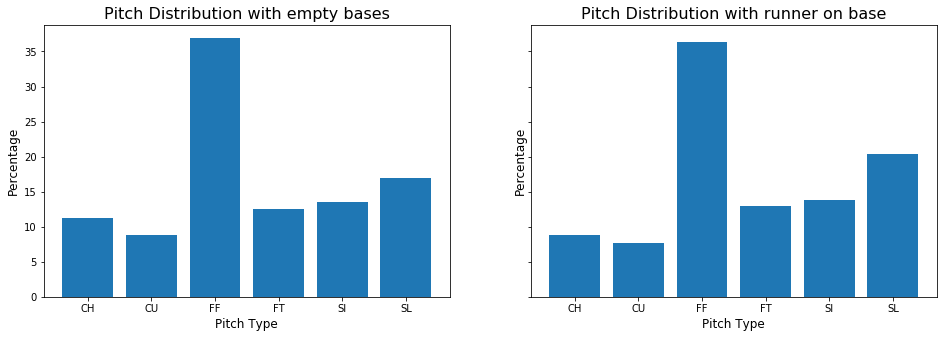

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 5))


ax1.bar(p_empty_bases['pitch_type'], p_empty_bases['percentage'])
ax1.set_xlabel('Pitch Type', size=12)
ax1.set_ylabel('Percentage', size=12)
ax1.set_title('Pitch Distribution with empty bases', size=16)


ax2.bar(p_on_base['pitch_type'], p_on_base['percentage'])
ax2.set_xlabel('Pitch Type', size=12)
ax2.set_ylabel('Percentage', size=12)
ax2.set_title('Pitch Distribution with runner on base', size=16)

plt.show()

###### How does pitch selection change over the course of the season? (i.e. is there a preference as teams get closer to the playoffs)

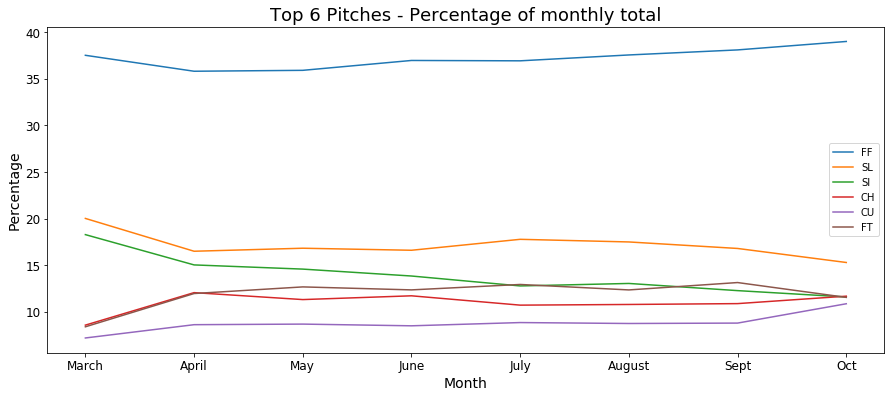

In [18]:
agg_2 = df.set_index('date')
agg_2['month'] = agg_2.index.month
agg_2 = agg_2.groupby(['month', 'pitch_type']).size().reset_index().rename(columns={0:'count'})

total_month = dict(agg_2.groupby('month')['count'].sum())
total_month

agg_2['total_month'] = agg_2['month'].apply(lambda x: total_month[x])
agg_2['percentage'] = agg_2['count'] / agg_2['total_month'] * 100
agg_2

pitches = ['FF', 'SL', 'SI', 'CH', 'CU', 'FT']

plt.figure(figsize=(15, 6))

for pitch in pitches:
    data = agg_2[agg_2['pitch_type'] == pitch]
    plt.plot(data['month'], data['percentage'], label=pitch)

plt.xlabel('Month', size=14)
plt.xticks(np.arange(3, 11), 
           ['March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct'], 
          size=12)
plt.ylabel('Percentage', size=14)
plt.yticks(size=12)
plt.title('Top 6 Pitches - Percentage of monthly total', size=18)
plt.legend()
plt.show()

### Predictive Model

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

##### Engineer features

Covert string from columns "stand" and "p_throws" to integers.

In [20]:
feature_dict = {'R':1, 'L':2}
df['stand_int'] = df['stand'].apply(lambda x: feature_dict[x])
df['p_throws_int'] = df['p_throws'].apply(lambda x: feature_dict[x])

In [21]:
col_to_keep = ['game_pk', 'team_id_b', 'team_id_p', 'inning', 'balls', 'strikes', 'fouls', 'outs', 'stand_int', 'p_throws_int', 'pitch_type']

ml = df[col_to_keep]

In [22]:
ml.head()

,game_pk,team_id_b,team_id_p,inning,balls,strikes,fouls,outs,stand_int,p_throws_int,pitch_type
0,286874,118,108,1,0,0,0,0,1,1,FF
1,286874,118,108,1,0,1,0,0,1,1,FF
2,286874,118,108,1,1,1,0,0,1,1,FF
3,286874,118,108,1,2,1,0,0,1,1,FF
4,286874,118,108,1,2,2,1,0,1,1,FF


Set features and labels.

---

In [23]:
feature = ml.iloc[:, 0:-1]
label = ml['pitch_type']

In [24]:
feature.head()

,game_pk,team_id_b,team_id_p,inning,balls,strikes,fouls,outs,stand_int,p_throws_int
0,286874,118,108,1,0,0,0,0,1,1
1,286874,118,108,1,0,1,0,0,1,1
2,286874,118,108,1,1,1,0,0,1,1
3,286874,118,108,1,2,1,0,0,1,1
4,286874,118,108,1,2,2,1,0,1,1


In [25]:
label.head()

0    FF
1    FF
2    FF
3    FF
4    FF
Name: pitch_type, dtype: object

---

Model Baseline:
* The simple baseline is 33% given fastballs appear the most at 1/3 of the time. Moving forward, the I'd measure success by how much improvement I'm able to make to the model compared to the "out of the box" version.

In [26]:
p[:6]

,pitch_type,count,percentage
0,FF,238541,33.284125
1,SL,109756,15.314484
2,SI,87740,12.242546
3,FT,81056,11.309913
4,CH,72641,10.135751
5,CU,56379,7.866680


---

Here I'll try out both LinearSVC and Logistic Regression models to see which one provides the better result.

### LinearSVC

In [27]:
linear = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=4)

linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [28]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         CH       0.13      0.22      0.17     18170
         CU       0.00      0.00      0.00     14068
         FF       0.00      0.00      0.00     59615
         FT       0.00      0.00      0.00     20306
         SI       0.00      0.00      0.00     21960
         SL       0.18      0.83      0.29     27410

avg / total       0.04      0.17      0.07    161529



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [29]:
logistic = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=4)

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         CH       0.00      0.00      0.00     18170
         CU       0.00      0.00      0.00     14068
         FF       0.37      1.00      0.54     59615
         FT       0.00      0.00      0.00     20306
         SI       0.00      0.00      0.00     21960
         SL       0.00      0.00      0.00     27410

avg / total       0.14      0.37      0.20    161529



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---

Steps I'd take to improve model:
 * I would include more feature engineering in the model. Based on the exploratory analysis I was able to complete in this time span, I'd be interested in adding the balls/strikes count, what time of the year they're playing in.
 * I'm also interested to in adding how many runners are on the bases, i.e., does bases loaded versus no one on base have an impact on pitch selection.
 * Another one is how does the next batter in the line up impact pitch selection (e.g., is  a pitcher going to walk the current batter given who the next batter is, or be more aggressive and try to strike out the batter for the same reason).
 * Another interested concept to look at would be how pitchers change their pitching selection based on which team they are with. Do different pitcher, catcher combinations have different results depending on which team the pitcher is with (being attributed to bullpen strategy).
 * I would also add feature engineering with statiscal components. A Markov model may produce good results with this dataset.
 * I would also adjust model parameters using GridSearchCV, as well as use ridge and lasso to regulate the data.
 * Model success is to have a single model where I can simply input new pitcher information into that model and it'll perform well for pitchers where I don't have much historical data on.